In [ ]:
# Reading the data
import pandas as pd

df = pd.read_csv("calories_burn.csv")

In [227]:
# showing the first 5 rows
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [228]:
# using info() to know the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [229]:
# using describe() to have an overview of the numerical columns
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [230]:
# to make sure that there are no duplicated rows
df.duplicated().sum()

0

In [231]:
#checking the missing values
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


# Some notes about the results

In [232]:
df["User_ID"].duplicated().sum()

0

In [233]:
# lets draw histograms with KDE for the numerical columns to know how they are distributed
# split categorical and numarical
# but before splitting them, I will drop the "id" column, because all the values are unique so it hasn't any value to us. Especially when building the model
df.drop(columns = ["User_ID"], inplace = True)

In [234]:
df_numerical_features = df.select_dtypes(include='number')
df_numerical_features.columns

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

In [235]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['Gender'], dtype='object')

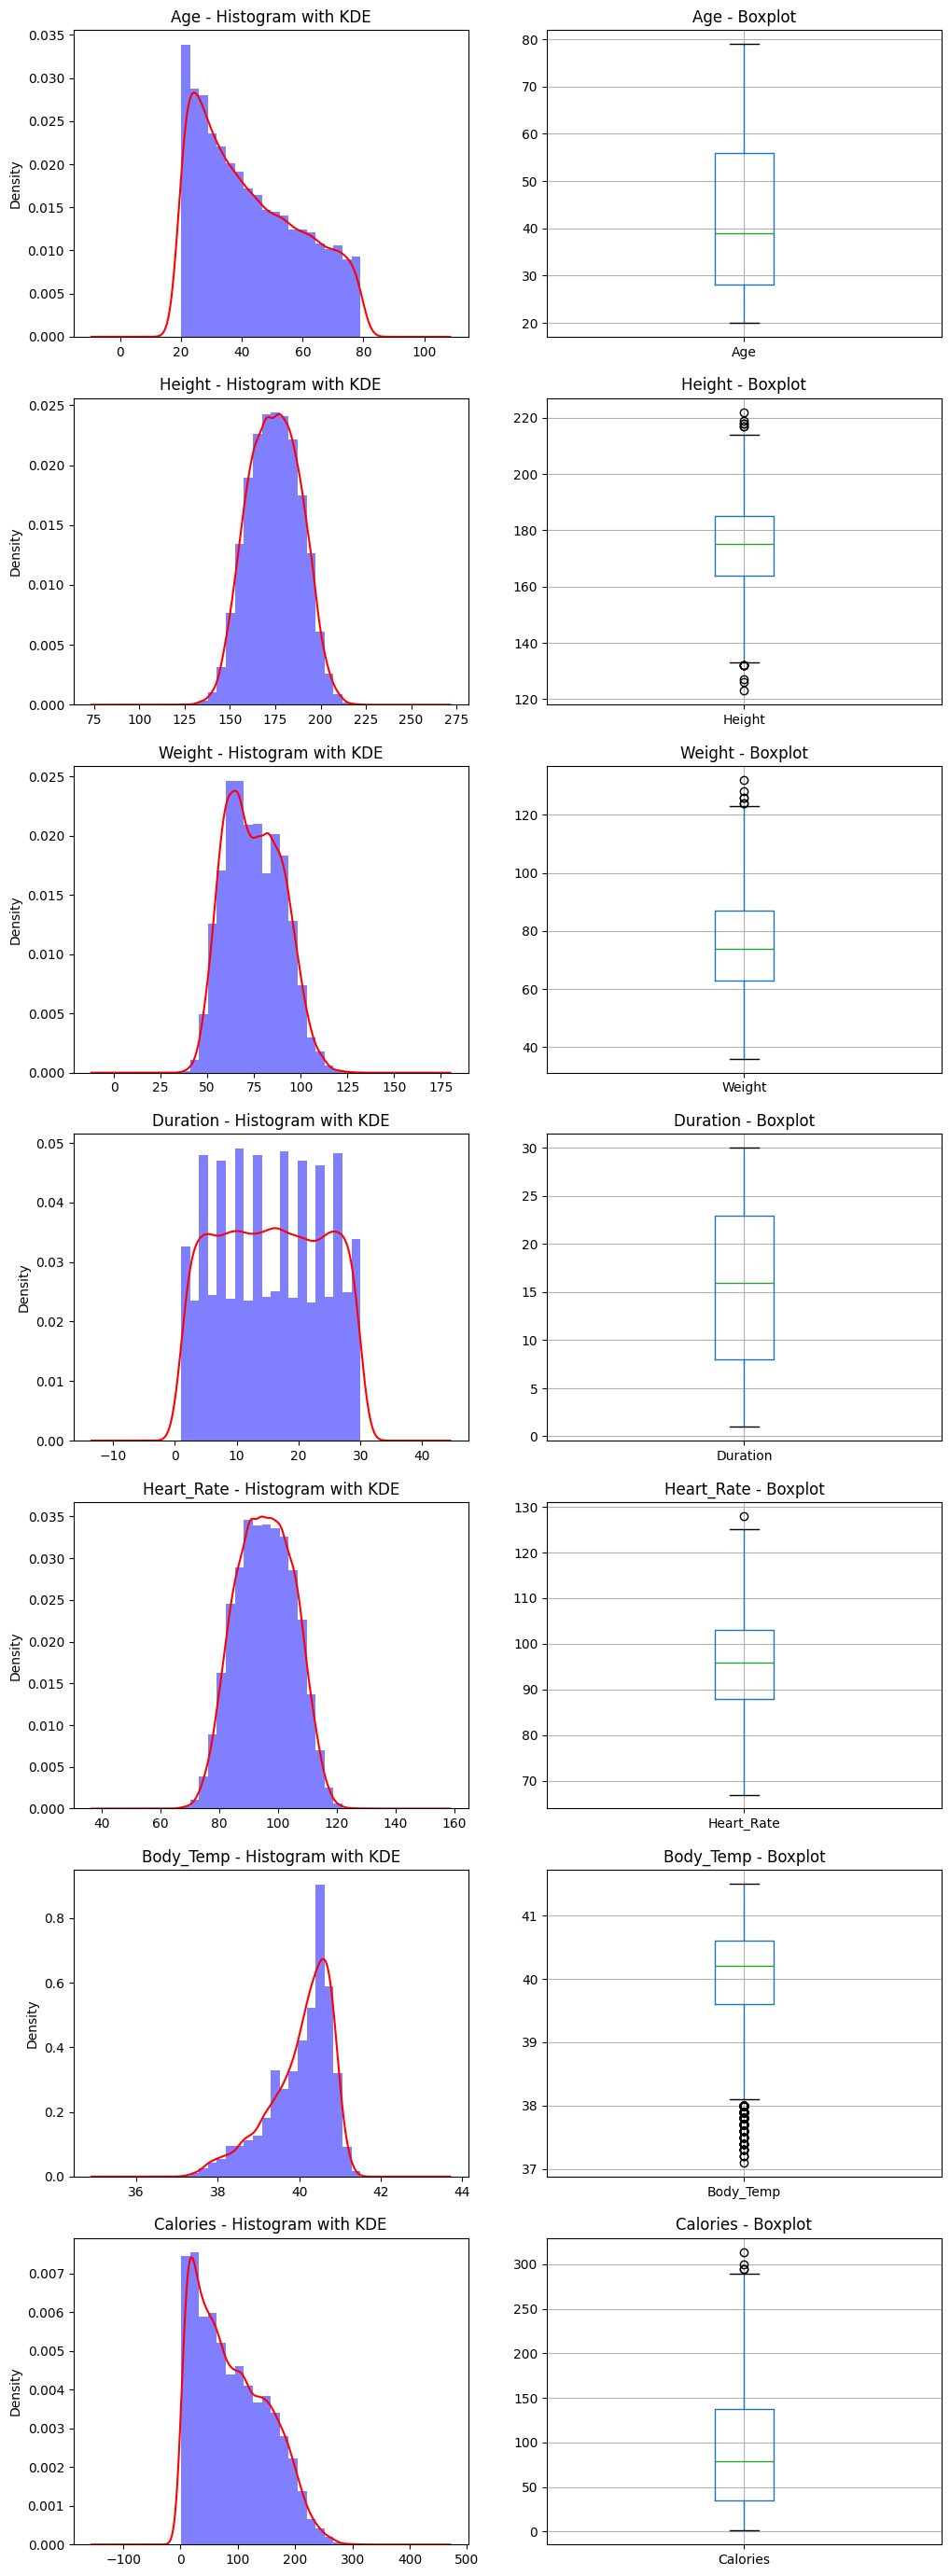

In [236]:
# now, the data is ready to be used to draw the histograms
import numpy as np
import matplotlib.pyplot as plt

# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_numerical_features.columns), 2, figsize=(12, 5 * len(df_numerical_features.columns)))

for i, col in enumerate(df_numerical_features.columns):
    # Histogram with KDE
    df_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # We can add Boxplot to be more clear
    # Boxplot
    df_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.show()

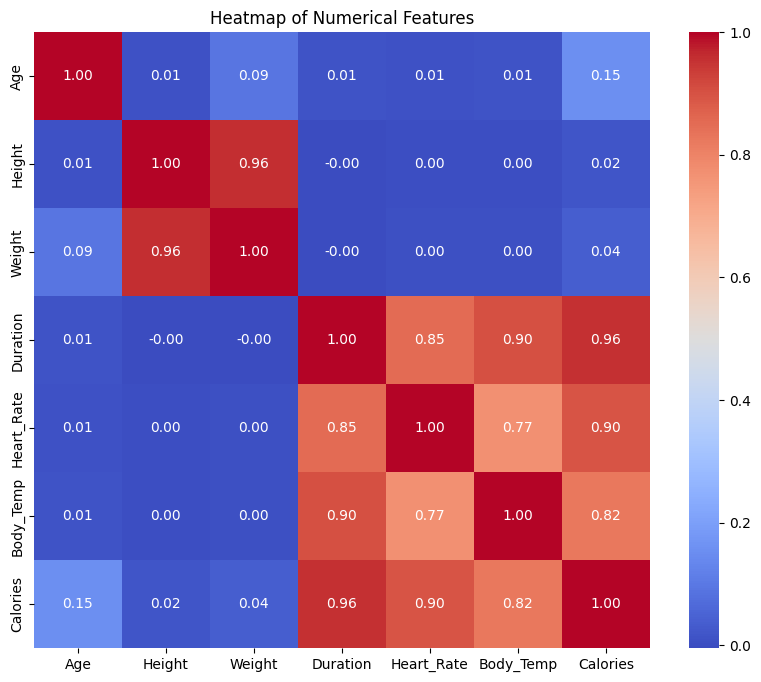

In [237]:
# draw a heatmap to know if there is correltaion between the columns
import seaborn as sns
corr = df_numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

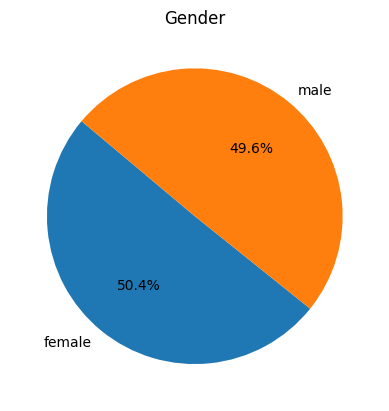

In [238]:
counts = df_categorical_features["Gender"].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender")
plt.show()

# Some notes about the results

# Data pre-processing

In [239]:
# Drop the outliers
for i in df_numerical_features.columns:
  # Compute IQR
  Q1 = df[i].quantile(0.25)  # 25th percentile
  Q3 = df[i].quantile(0.75)  # 75th percentile
  IQR = Q3 - Q1           # IQR range

  # Define outlier bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Replace values outside bounds with the min/max acceptable values
  df[i] = df[i].apply(lambda x: np.nan if x < lower_bound else (np.nan if x > upper_bound else x))

In [240]:
df = df.dropna()

In [241]:
df_encoded = pd.get_dummies(df, columns=['Gender'])

In [242]:
# note: the columns that contains True/False are "bool" not "object", so it's acceptable by the model
df_encoded.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,68,190.0,94.0,29,105.0,40.8,231.0,False,True
1,20,166.0,60.0,14,94.0,40.3,66.0,True,False
2,69,179.0,79.0,5,88.0,38.7,26.0,False,True
3,34,179.0,71.0,13,100.0,40.5,71.0,True,False
4,27,154.0,58.0,10,81.0,39.8,35.0,True,False


In [243]:
# split the target column
X = df_encoded.drop(columns=['Calories'],axis=1)
y = df_encoded['Calories']

In [244]:
# split the data into tain/test
from sklearn.model_selection import train_test_split

In [245]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=42)

In [246]:
# Scale the data using StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [247]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Initialize the model
lgbm = lgb.LGBMRegressor()

# Define the parameter grid
param_grid_lgbm = {
    'num_leaves': [31, 50],
    'max_depth': [10, 15],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

# Perform GridSearchCV
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters for LightGBM: {grid_search_lgbm.best_params_}")
print(f"Best CV score (MSE) for LightGBM: {grid_search_lgbm.best_score_:.4f}")

# Evaluate on the test set
y_pred_lgbm = grid_search_lgbm.best_estimator_.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print(f"Test MSE for LightGBM: {mse_lgbm:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 11688, number of used features: 8
[LightGBM] [Info] Start training from score 91.728782
Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'num_leaves': 50}
Best CV score (MSE) for LightGBM: -2.8424
Test MSE for LightGBM: 2.4678


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [248]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor()

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best CV score (MSE) for XGBoost: {-grid_search_xgb.best_score_:.4f}")

# Evaluate on the test set
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Test MSE for XGBoost: {mse_xgb:.4f}")

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best CV score (MSE) for XGBoost: 2.8760
Test MSE for XGBoost: 2.5324


In [249]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize the model
et = ExtraTreesRegressor(random_state=42)

# Define the parameter grid
param_grid_et = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Perform GridSearchCV
grid_search_et = GridSearchCV(et, param_grid_et, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_et.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters for Extra Trees: {grid_search_et.best_params_}")
print(f"Best CV score (MSE) for Extra Trees: {-grid_search_et.best_score_:.4f}")

# Evaluate on the test set
y_pred_et = grid_search_et.best_estimator_.predict(X_test)
mse_et = mean_squared_error(y_test, y_pred_et)
print(f"Test MSE for Extra Trees: {mse_et:.4f}")

Best parameters for Extra Trees: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score (MSE) for Extra Trees: 6.1309
Test MSE for Extra Trees: 5.1270


In [250]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best CV score (MSE) for Random Forest: {-grid_search_rf.best_score_:.4f}")

# Evaluate on the test set
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Test MSE for Random Forest: {mse_rf:.4f}")

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score (MSE) for Random Forest: 8.7949
Test MSE for Random Forest: 7.6212


In [251]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6],
    'min_samples_split': [2, 5]
}

# Perform GridSearchCV
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best CV score (MSE) for Gradient Boosting: {-grid_search_gb.best_score_:.4f}")

# Evaluate on the test set
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Test MSE for Gradient Boosting: {mse_gb:.4f}")

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score (MSE) for Gradient Boosting: 3.0130
Test MSE for Gradient Boosting: 2.5541


In [252]:
# save scaler
import joblib
joblib.dump(scaler, 'cal_scaler.pkl')
joblib.dump(grid_search_lgbm.best_estimator_, 'cal_model.pkl')

['cal_model.pkl']